### 1 Think about which loop in the CPU implementation can be parallelized
Parallelize the two loop: Use 
```
#pragma omp parallel for collapse(2)
for (int y = 0; y < height; ++y) {
    for (int x = 0; x < width; ++x) {
        # computing
    }
}
```
to merge the two nested loops into a single loop for parallelization.


### 2 Record the runtime for GPU or multi-core CPU compared to the one without using parallel computing
### 3 Calculate the speedup of parallel computing compared to the one without parallel computing

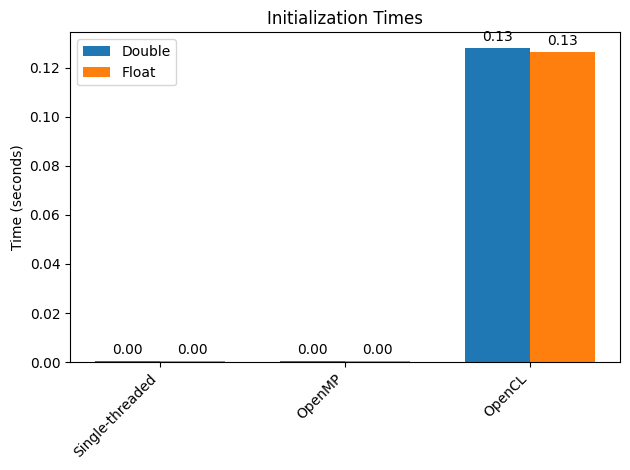

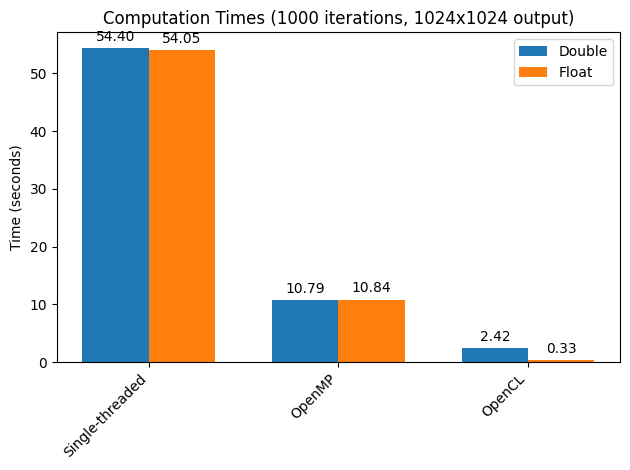

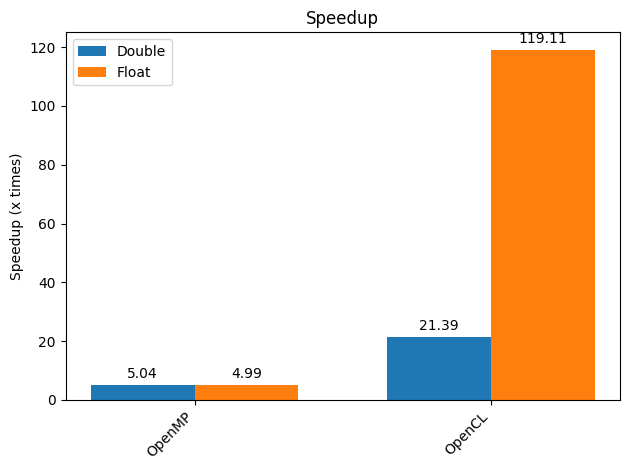

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 从 speedup_result.txt 文件中读取数据
data = {}
with open('./output/speedup_result.txt', 'r') as file:
    lines = file.readlines()
    precision = None
    for line in lines:
        if line.startswith("Precision:"):
            precision = line.split(":")[1].strip()
            data[precision] = {}
        elif "duration" in line:
            key, value = line.split(":")
            key = key.replace(" duration", "").strip()
            value = float(value.split()[0])
            data[precision][key] = value
        elif "Speedup" in line:
            key, value = line.split(":")
            key = key.strip()
            value = float(value.split()[0].replace('x', ''))
            data[precision][key] = value

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# 绘制初始化时间图表
fig, ax = plt.subplots()

init_labels = [key.split()[0] for key in data["Double"] if 'initialization' in key]
double_init_times = [data["Double"][key] for key in data["Double"] if 'initialization' in key]
float_init_times = [data["Float"][key] for key in data["Float"] if 'initialization' in key]

x = np.arange(len(init_labels))  # 标签位置
width = 0.35  # 条形图的宽度

rects1 = ax.bar(x - width/2, double_init_times, width, label='Double')
rects2 = ax.bar(x + width/2, float_init_times, width, label='Float')
ax.set_title('Initialization Times')
ax.set_ylabel('Time (seconds)')
ax.set_xticks(x)
ax.set_xticklabels(init_labels, rotation=45, ha='right')
ax.legend()

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

# 绘制计算时间图表
fig, ax = plt.subplots()

comp_labels = [key.split()[0] for key in data["Double"] if 'computation' in key]
double_comp_times = [data["Double"][key] for key in data["Double"] if 'computation' in key]
float_comp_times = [data["Float"][key] for key in data["Float"] if 'computation' in key]

x = np.arange(len(comp_labels))  # 标签位置
width = 0.35  # 条形图的宽度

rects1 = ax.bar(x - width/2, double_comp_times, width, label='Double')
rects2 = ax.bar(x + width/2, float_comp_times, width, label='Float')
ax.set_title('Computation Times (1000 iterations, 1024x1024 output)')
ax.set_ylabel('Time (seconds)')
ax.set_xticks(x)
ax.set_xticklabels(comp_labels, rotation=45, ha='right')
ax.legend()

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

# 绘制加速比图表
fig, ax = plt.subplots()

speedup_labels = [key for key in data["Double"] if 'Speedup' in key]
double_speedup = [data["Double"][key] for key in speedup_labels]
float_speedup = [data["Float"][key] for key in speedup_labels]

speedup_labels = [label.split()[0] for label in speedup_labels]

x = np.arange(len(speedup_labels))  # 标签位置
width = 0.35  # 条形图的宽度

rects1 = ax.bar(x - width/2, double_speedup, width, label='Double')
rects2 = ax.bar(x + width/2, float_speedup, width, label='Float')
ax.set_title('Speedup')
ax.set_ylabel('Speedup (x times)')
ax.set_xticks(x)
ax.set_xticklabels(speedup_labels, rotation=45, ha='right')
ax.legend()

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()


### 4 Check the result consistency between using parallel computing and without using parallel computing

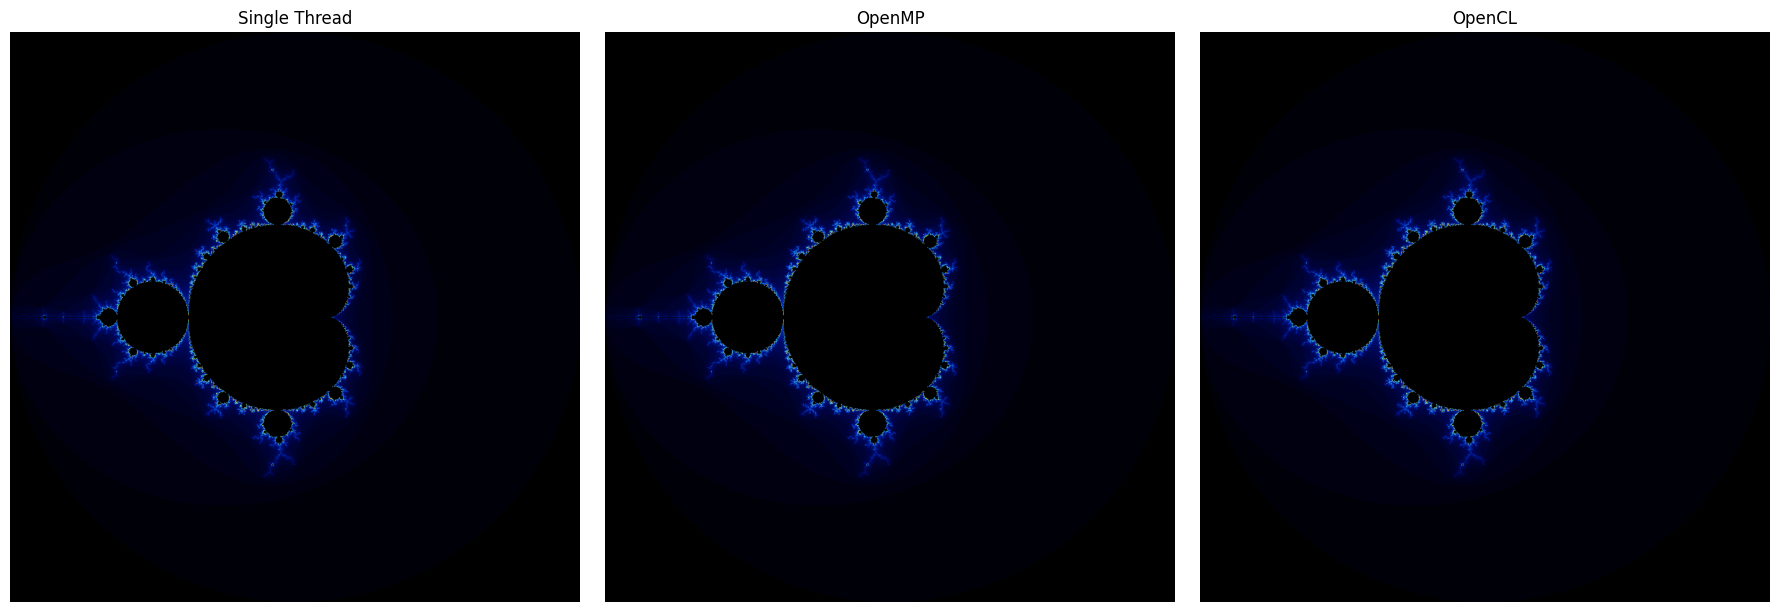

Result consistency between using parallel computing and without using parallel computing: True


In [8]:
from PIL import Image
# 展示三张图像
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 生成示例图像数据
image1 = Image.open('./output/output_single.png')
image2 = Image.open('./output/output_omp.png')
image3 = Image.open('./output/output_opencl.png')

axs[0].imshow(image1)
axs[0].set_title('Single Thread')
axs[0].axis('off')

axs[1].imshow(image2)
axs[1].set_title('OpenMP')
axs[1].axis('off')

axs[2].imshow(image3)
axs[2].set_title('OpenCL')
axs[2].axis('off')


plt.tight_layout()
plt.show()

# 检查结果一致性
consistency = np.allclose(image1, image2) and np.allclose(image1, image3)
print(f'Result consistency between using parallel computing and without using parallel computing: {consistency}')